In [1]:
import numpy as np
import pandas as pd

In [2]:
mta = pd.read_csv("mta_clean.zip")


In [3]:
mta.head()

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total
0,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03 00:00:00,04:00:00,2019-08-03 04:00:00,Saturday,0.0,10.0,10.0
1,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03 00:00:00,08:00:00,2019-08-03 08:00:00,Saturday,0.0,7.0,7.0
2,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03 00:00:00,12:00:00,2019-08-03 12:00:00,Saturday,0.0,10.0,10.0
3,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03 00:00:00,16:00:00,2019-08-03 16:00:00,Saturday,0.0,12.0,12.0
4,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03 00:00:00,20:00:00,2019-08-03 20:00:00,Saturday,0.0,11.0,11.0


In [4]:
mta.tail()

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total
1230536,ZEREGA AV,ZEREGA AV-R419-R326-00-05-01,R419,R326,00-05-01,6,1,IRT,REGULAR,2019-09-13 00:00:00,05:00:00,2019-09-13 05:00:00,Friday,0.0,0.0,0.0
1230537,ZEREGA AV,ZEREGA AV-R419-R326-00-05-01,R419,R326,00-05-01,6,1,IRT,REGULAR,2019-09-13 00:00:00,09:00:00,2019-09-13 09:00:00,Friday,0.0,0.0,0.0
1230538,ZEREGA AV,ZEREGA AV-R419-R326-00-05-01,R419,R326,00-05-01,6,1,IRT,REGULAR,2019-09-13 00:00:00,13:00:00,2019-09-13 13:00:00,Friday,0.0,0.0,0.0
1230539,ZEREGA AV,ZEREGA AV-R419-R326-00-05-01,R419,R326,00-05-01,6,1,IRT,REGULAR,2019-09-13 00:00:00,17:00:00,2019-09-13 17:00:00,Friday,0.0,0.0,0.0
1230540,ZEREGA AV,ZEREGA AV-R419-R326-00-05-01,R419,R326,00-05-01,6,1,IRT,REGULAR,2019-09-13 00:00:00,21:00:00,2019-09-13 21:00:00,Friday,0.0,0.0,0.0


In [5]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230541 entries, 0 to 1230540
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   station    1230541 non-null  object 
 1   turnstile  1230541 non-null  object 
 2   ca         1230541 non-null  object 
 3   unit       1230541 non-null  object 
 4   scp        1230541 non-null  object 
 5   linename   1230541 non-null  object 
 6   num_lines  1230541 non-null  int64  
 7   division   1230541 non-null  object 
 8   desc       1230541 non-null  object 
 9   date       1230541 non-null  object 
 10  time       1230541 non-null  object 
 11  timestamp  1230541 non-null  object 
 12  weekday    1230541 non-null  object 
 13  entries    1230541 non-null  float64
 14  exits      1230541 non-null  float64
 15  total      1230541 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 150.2+ MB


In [6]:
mta.shape

(1230541, 16)

# Data Analysis

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [8]:
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

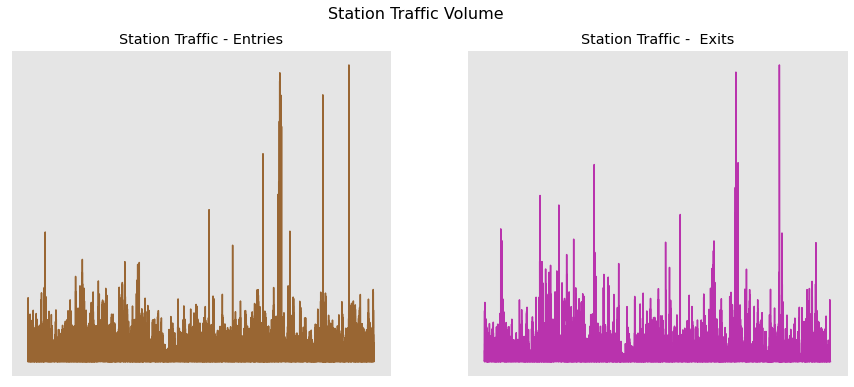

In [15]:
# Check to see the daily traffic volume

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.set_figwidth(15)
fig.set_figheight(6)

fig.suptitle('Station Traffic Volume',fontsize = 16)

ax[0].plot(mta['entries'], c='#996633')
ax[0].set_title('Station Traffic - Entries')
plt.grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(mta['exits'],  c='#B933AD')
ax[1].set_title('Station Traffic -  Exits')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.grid(False);

#plt.savefig("Station Traffic Volumne.svg")

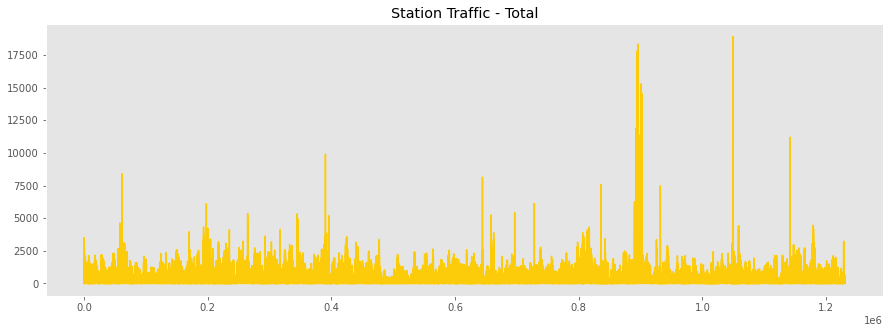

In [10]:
# Plot the Total Traffic Volume

plt.figure(figsize = [15,5])
plt.plot(mta['total'], c='#FCCC0A')
plt.title('Station Traffic - Total')
# Hide grid lines
plt.grid(False);
#plt.savefig("Station Traffic Total.svg")

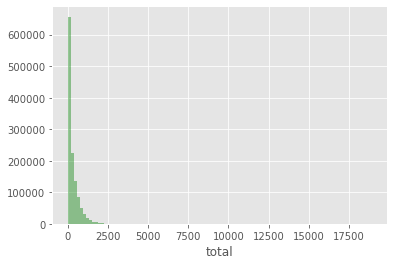

In [11]:
# See the density plot with Seaborn

sns.distplot(mta['total'],kde=False, bins = 100, color = 'green') ;

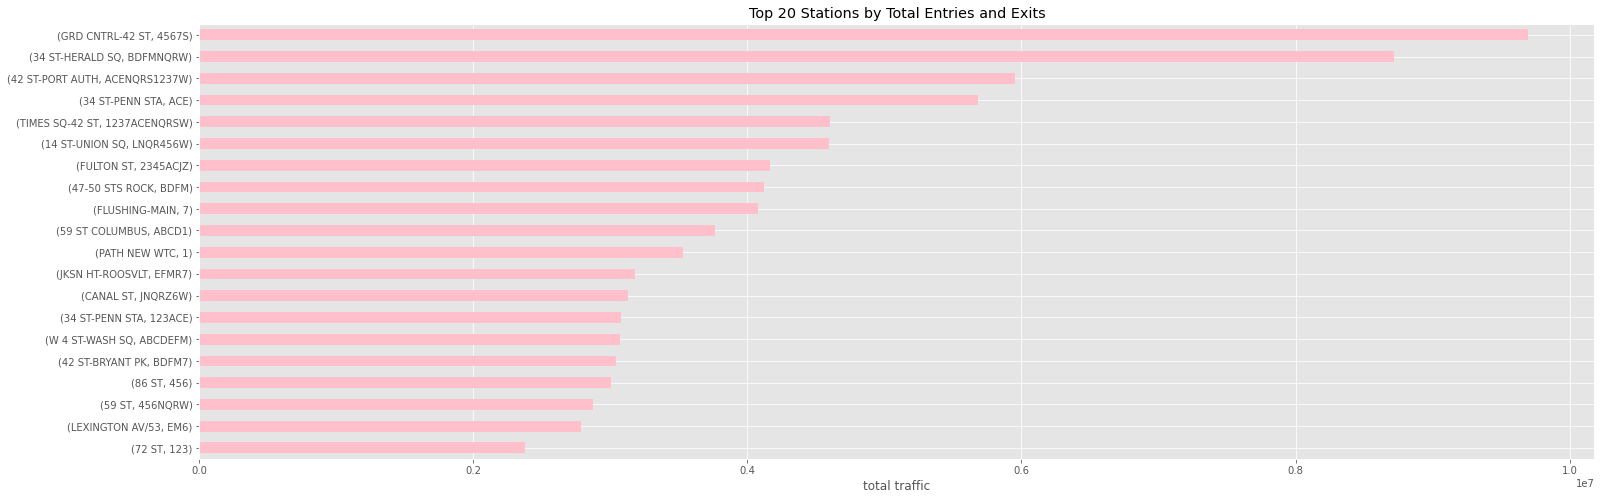

In [16]:
# Top 20 traffic volume groupby station and linename

top_20 =mta.groupby(['station','linename']).agg({'total':sum}).sort_values(by = 'total', ascending = False).head(20)


fig, ax = plt.subplots(figsize=(25, 8))
top_20.sort_values(by = 'total',ascending=True).plot(kind='barh', color ='pink',ax=ax)
ax.set(title='Top 20 Stations by Total Entries and Exits', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)


In [17]:
top_20_df = pd.DataFrame(top_20.reset_index())
top_20_df

,station,linename,total
0,GRD CNTRL-42 ST,4567S,9697076.0
1,34 ST-HERALD SQ,BDFMNQRW,8716589.0
2,42 ST-PORT AUTH,ACENQRS1237W,5950284.0
3,34 ST-PENN STA,ACE,5679370.0
4,TIMES SQ-42 ST,1237ACENQRSW,4600426.0
5,14 ST-UNION SQ,LNQR456W,4597114.0
6,FULTON ST,2345ACJZ,4165831.0
7,47-50 STS ROCK,BDFM,4120017.0
8,FLUSHING-MAIN,7,4076411.0
9,59 ST COLUMBUS,ABCD1,3759892.0


### Explore the linear regreassion relations between "how busy the station" and "more lines in the station"

- Calculate the numbers of lines in top 20 stations
- Plot a scatter plot and a joint plot with histgram
- Calculate P-value and correlations to test hypothesis

In [18]:
# Calcute numbers of lines in the top 20 stations

lines = list(top_20_df.linename)


line_num = []
for line in lines:
    line_num.append(len(str(line)))


top_20_df['number of lines'] =  line_num

top_20_df

,station,linename,total,number of lines
0,GRD CNTRL-42 ST,4567S,9697076.0,5
1,34 ST-HERALD SQ,BDFMNQRW,8716589.0,8
2,42 ST-PORT AUTH,ACENQRS1237W,5950284.0,12
3,34 ST-PENN STA,ACE,5679370.0,3
4,TIMES SQ-42 ST,1237ACENQRSW,4600426.0,12
5,14 ST-UNION SQ,LNQR456W,4597114.0,8
6,FULTON ST,2345ACJZ,4165831.0,8
7,47-50 STS ROCK,BDFM,4120017.0,4
8,FLUSHING-MAIN,7,4076411.0,1
9,59 ST COLUMBUS,ABCD1,3759892.0,5


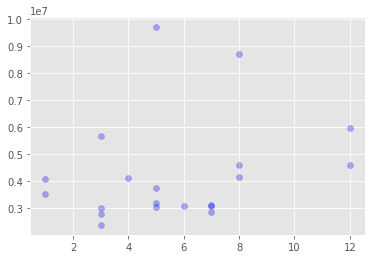

In [20]:
# Explore the linear regression hypothesis with a scatterplot

plt.scatter(top_20_df.iloc[:,-1], top_20_df.iloc[:,-2], c='blue', alpha = 0.3);

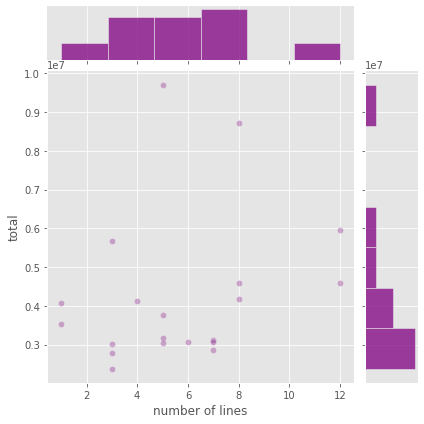

In [21]:
# Plot a joint plot with Seaborn
sns.jointplot(top_20_df.iloc[:,-1], top_20_df.iloc[:,-2], color='purple', alpha = 0.3);

In [22]:
# Test the hypothesis by calculating P-value and correlations

from scipy import stats

print (stats.ttest_ind(np.array(top_20_df.iloc[:,-1]), np.array(top_20_df.iloc[:,-2])))

subset_20 = top_20_df.drop(['station','linename'],axis =1)
top_20_df_subset_corr = pd.DataFrame(np.corrcoef(subset_20.T)) # corrcoef function calculates row based correlations by default, but we want column correlations
top_20_df_subset_corr.columns = ['line_num','total']
top_20_df_subset_corr.index = ['line_num','total']
top_20_df_subset_corr

Ttest_indResult(statistic=-9.856443113953937, pvalue=5.094963334573637e-12)


,line_num,total
line_num,1.00000,0.26355
total,0.26355,1.00000


#### Generate less granualar Top 20 to explore since some stations share the same name

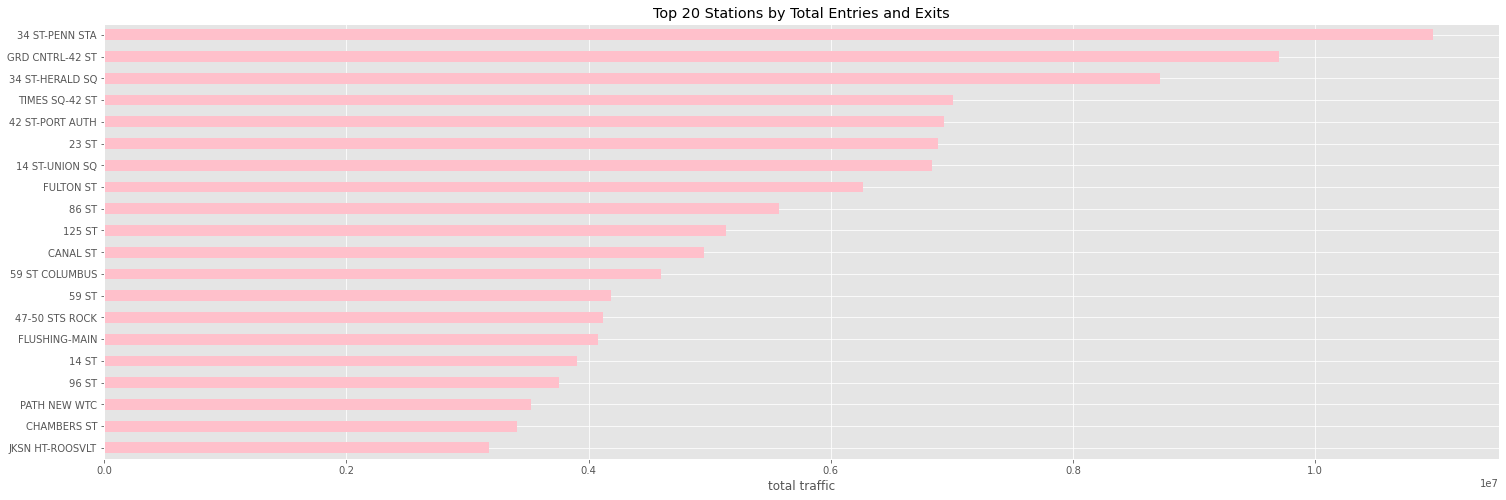

In [23]:
# Top 20 station groupby only sataion name

top_20_s =mta.groupby(['station']).agg({'total':sum}).sort_values(by = 'total', ascending = False).head(20)


fig, ax = plt.subplots(figsize=(25, 8))
top_20_s.sort_values(by = 'total',ascending=True).plot(kind='barh', color ='pink',ax=ax)
ax.set(title='Top 20 Stations by Total Entries and Exits', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)


In [24]:
top_20_s_df = pd.DataFrame(top_20_s.reset_index())
top_20_s_df

,station,total
0,34 ST-PENN STA,10968555.0
1,GRD CNTRL-42 ST,9697076.0
2,34 ST-HERALD SQ,8716589.0
3,TIMES SQ-42 ST,7007575.0
4,42 ST-PORT AUTH,6934572.0
5,23 ST,6887914.0
6,14 ST-UNION SQ,6837308.0
7,FULTON ST,6269040.0
8,86 ST,5576099.0
9,125 ST,5137503.0


In [25]:
# Combining both Top 20 list and find out the uniqe values

combined = set(list(top_20_df['station']) + list(top_20_s_df['station']))
combined

{'125 ST',
 '14 ST',
 '14 ST-UNION SQ',
 '23 ST',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '47-50 STS ROCK',
 '59 ST',
 '59 ST COLUMBUS',
 '72 ST',
 '86 ST',
 '96 ST',
 'CANAL ST',
 'CHAMBERS ST',
 'FLUSHING-MAIN',
 'FULTON ST',
 'GRD CNTRL-42 ST',
 'JKSN HT-ROOSVLT',
 'LEXINGTON AV/53',
 'PATH NEW WTC',
 'TIMES SQ-42 ST',
 'W 4 ST-WASH SQ'}

In [ ]:
 '''14 ST',
 '14 ST-UNION SQ',
 '23 ST',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '47-50 STS ROCK',
 '59 ST',
 '59 ST COLUMBUS'
 'CANAL ST',
 'CHAMBERS ST',
 'GRD CNTRL-42 ST',
 'LEXINGTON AV/53',
 'PATH NEW WTC',
 'TIMES SQ-42 ST',
 'W 4 ST-WASH SQ'''

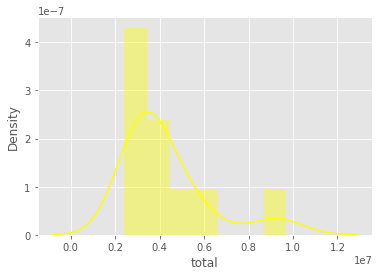

In [26]:
# Explore Top 20 in a histgram

sns.distplot(top_20['total'],kde=True, color = 'yellow');


In [27]:
# Keep the stations in the targeted geographic scope : Midtwon and Downtown Manhattan, close to large tech companies

station = ['14 ST',
 '14 ST-UNION SQ',
 '23 ST',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '47-50 STS ROCK',
 '59 ST',
 '59 ST COLUMBUS'
 'CANAL ST',
 'CHAMBERS ST',
 'GRD CNTRL-42 ST',
 'LEXINGTON AV/53',
 'PATH NEW WTC',
 'TIMES SQ-42 ST',
 'W 4 ST-WASH SQ']

In [28]:
# Slice the kept stations' rows out from the orginal dataset

station_df = mta[mta['station'].isin(station)]
station_df

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total
45681,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,05:00:00,2019-08-03 05:00:00,Saturday,99.0,48.0,147.0
45682,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,09:00:00,2019-08-03 09:00:00,Saturday,55.0,180.0,235.0
45683,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,13:00:00,2019-08-03 13:00:00,Saturday,221.0,564.0,785.0
45684,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,17:00:00,2019-08-03 17:00:00,Saturday,428.0,693.0,1121.0
45685,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,21:00:00,2019-08-03 21:00:00,Saturday,440.0,546.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182386,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,05:00:00,2019-09-13 05:00:00,Friday,153.0,33.0,186.0
1182387,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,09:00:00,2019-09-13 09:00:00,Friday,691.0,252.0,943.0
1182388,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,13:00:00,2019-09-13 13:00:00,Friday,996.0,512.0,1508.0
1182389,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,17:00:00,2019-09-13 17:00:00,Friday,1677.0,289.0,1966.0


In [29]:
station_df.shape

(186286, 16)

In [30]:
# Run another quick p-value test to see if there could be any linear relationship 

from scipy import stats

print (stats.ttest_ind(np.array(station_df.loc[:,"num_lines"]), np.array(station_df.loc[:,"total"])))


Ttest_indResult(statistic=-367.19542876001543, pvalue=0.0)


,station,linename,total
0,GRD CNTRL-42 ST,4567S,9697076.0
1,34 ST-HERALD SQ,BDFMNQRW,8716589.0
2,42 ST-PORT AUTH,ACENQRS1237W,5950284.0
3,34 ST-PENN STA,ACE,5679370.0
4,TIMES SQ-42 ST,1237ACENQRSW,4600426.0
5,14 ST-UNION SQ,LNQR456W,4597114.0
6,47-50 STS ROCK,BDFM,4120017.0
7,PATH NEW WTC,1,3527159.0
8,34 ST-PENN STA,123ACE,3073477.0
9,W 4 ST-WASH SQ,ABCDEFM,3067968.0


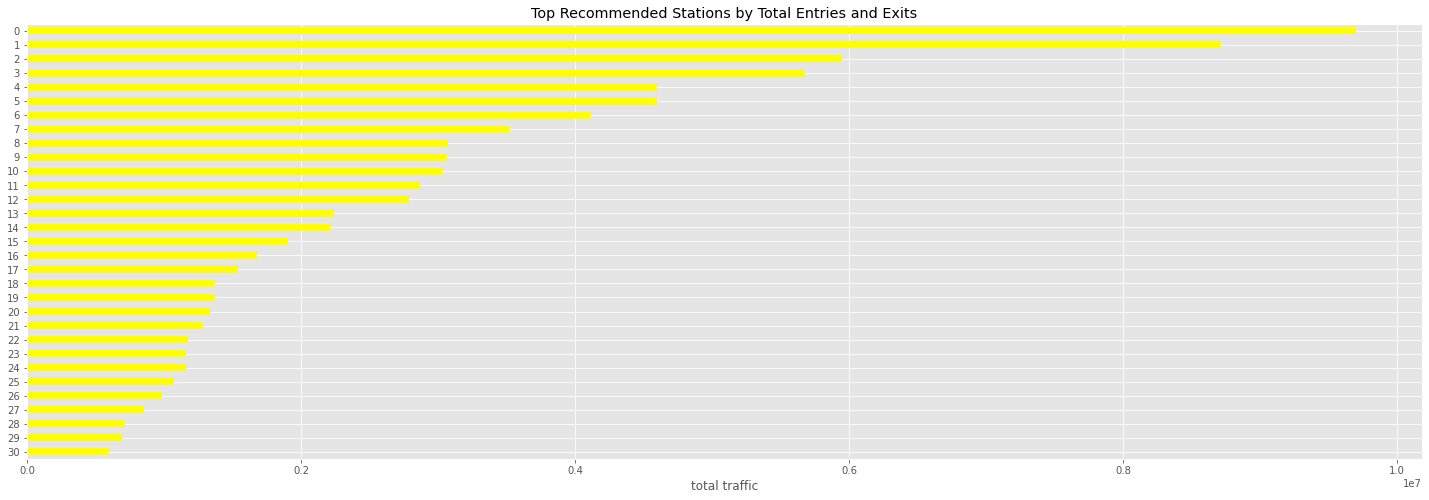

In [32]:
# Top 30 - Expand the final combined list without the stations not in the targeted areas

station_df_group =station_df.groupby(['station','linename']).agg({'total':sum}).sort_values(by = 'total', ascending = False).head(32).reset_index()


fig, ax = plt.subplots(figsize=(25, 8))
station_df_group.sort_values(by = 'total',ascending=True).plot(kind='barh', color ='yellow',ax=ax)
ax.set(title='Top Recommended Stations by Total Entries and Exits', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

station_df_group

In [33]:
station_df_group.sort_values(by = 'linename', ascending=True)

,station,linename,total
27,23 ST,1,855493.0
7,PATH NEW WTC,1,3527159.0
22,CHAMBERS ST,123,1174941.0
14,34 ST-PENN STA,123,2215708.0
25,TIMES SQ-42 ST,1237ACENQRS,1071828.0
4,TIMES SQ-42 ST,1237ACENQRSW,4600426.0
8,34 ST-PENN STA,123ACE,3073477.0
24,14 ST,123FLM,1158608.0
0,GRD CNTRL-42 ST,4567S,9697076.0
13,14 ST-UNION SQ,456LNQRW,2240194.0


### Check to see what lines are most popular 

In [34]:
# Flatten the line list from the final Top 30

line_name = list(station_df_group['linename'])

flat_list = [item for l in line_name for item in l]
                
print(flat_list)

['4', '5', '6', '7', 'S', 'B', 'D', 'F', 'M', 'N', 'Q', 'R', 'W', 'A', 'C', 'E', 'N', 'Q', 'R', 'S', '1', '2', '3', '7', 'W', 'A', 'C', 'E', '1', '2', '3', '7', 'A', 'C', 'E', 'N', 'Q', 'R', 'S', 'W', 'L', 'N', 'Q', 'R', '4', '5', '6', 'W', 'B', 'D', 'F', 'M', '1', '1', '2', '3', 'A', 'C', 'E', 'A', 'B', 'C', 'D', 'E', 'F', 'M', 'B', 'D', 'F', 'M', '7', '4', '5', '6', 'N', 'Q', 'R', 'W', 'E', 'M', '6', '4', '5', '6', 'L', 'N', 'Q', 'R', 'W', '1', '2', '3', 'F', 'M', '6', 'A', 'C', 'E', '2', '3', 'A', 'C', 'E', 'L', 'F', 'L', 'M', '1', '2', '3', 'A', 'C', 'E', 'N', 'Q', 'R', 'S', '1', '2', '3', '7', 'W', 'C', 'E', '1', '2', '3', 'N', 'R', 'W', '1', '2', '3', 'F', 'L', 'M', '1', '2', '3', '7', 'A', 'C', 'E', 'N', 'Q', 'R', 'S', 'A', 'C', 'E', 'N', 'G', 'R', 'S', '1', '2', '3', '7', 'W', '1', 'N', 'Q', 'R', '4', '5', '6', 'W', 'J', 'Z', '4', '5', '6', 'N', 'R', 'W']


In [35]:
# Calculate the frequency table among the lines - Most Popular lines: E, R, N, 1

rec_lines = pd.DataFrame(flat_list, columns = ['Line']).value_counts()

rec_lines

Line
E       12
R       12
N       12
1       12
C       11
W       11
2       11
3       11
A       10
Q        9
6        8
M        8
F        7
7        7
S        6
5        6
4        6
L        5
D        4
B        4
G        1
J        1
Z        1
dtype: int64

In [ ]:
#station_df_group.to_csv('stations.csv', index=False)

### Final Recommendation Stations

In [37]:
# Get rid of duplicates and fine tuned local lines not in the transferring hubs

station_rec = station_df_group # Drop 0,2,4,,7,8,11,13,14,16,19:30
station_rec

,station,linename,total
0,GRD CNTRL-42 ST,4567S,9697076.0
1,34 ST-HERALD SQ,BDFMNQRW,8716589.0
2,42 ST-PORT AUTH,ACENQRS1237W,5950284.0
3,34 ST-PENN STA,ACE,5679370.0
4,TIMES SQ-42 ST,1237ACENQRSW,4600426.0
5,14 ST-UNION SQ,LNQR456W,4597114.0
6,47-50 STS ROCK,BDFM,4120017.0
7,PATH NEW WTC,1,3527159.0
8,34 ST-PENN STA,123ACE,3073477.0
9,W 4 ST-WASH SQ,ABCDEFM,3067968.0


In [38]:
station_final = station_rec.drop([0,2,4,7,8,11,13,14,16,19,20,21,22,23,24,25,26,27,28,29,30], axis = 0)
station_final

,station,linename,total
1,34 ST-HERALD SQ,BDFMNQRW,8716589.0
3,34 ST-PENN STA,ACE,5679370.0
5,14 ST-UNION SQ,LNQR456W,4597114.0
6,47-50 STS ROCK,BDFM,4120017.0
9,W 4 ST-WASH SQ,ABCDEFM,3067968.0
10,42 ST-BRYANT PK,BDFM7,3040247.0
12,LEXINGTON AV/53,EM6,2786422.0
15,23 ST,FM,1905890.0
17,CHAMBERS ST,ACE23,1542464.0
18,14 ST,ACEL,1372689.0


In [39]:
station_final_index = station_final.set_index('station')

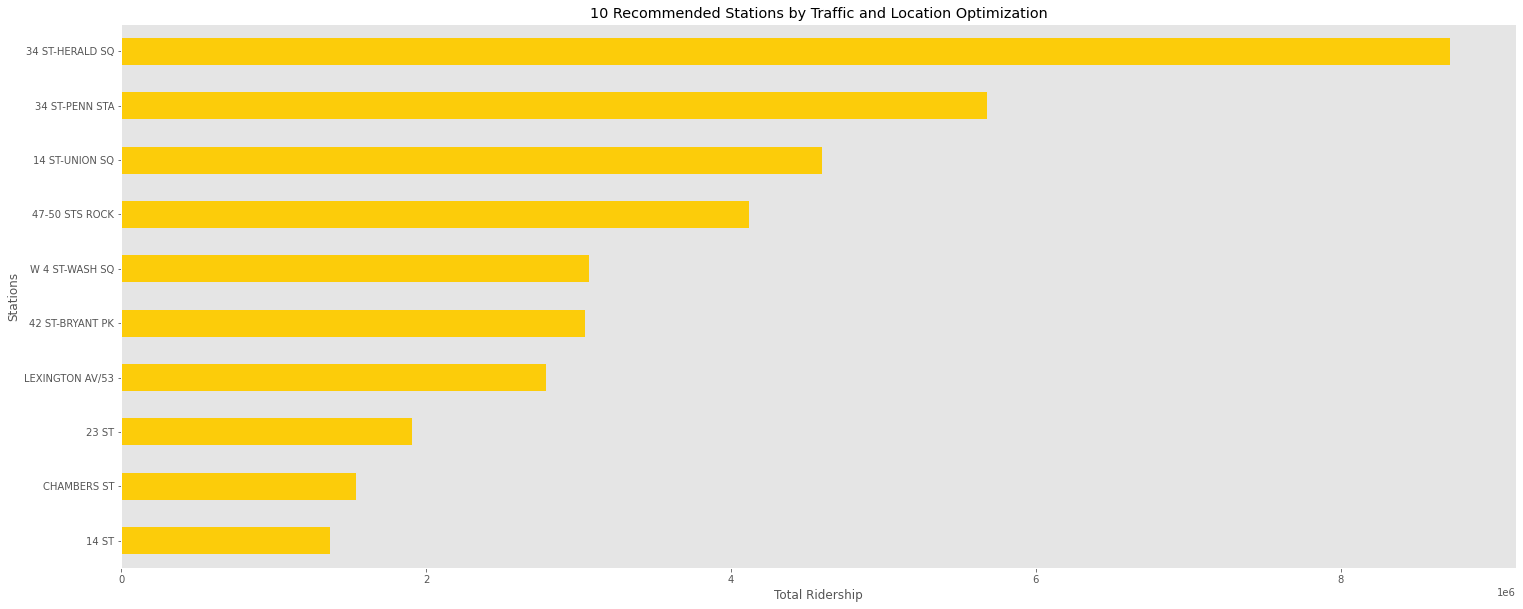

In [16]:
# Plot the Final 10 

fig, ax = plt.subplots(figsize=(25, 10))
station_final_index.sort_values(by = 'total',ascending=True).plot(kind='barh', color ='#FCCC0A',ax=ax)
ax.set(title='10 Recommended Stations by Traffic and Location Optimization')
ax.set(xlabel='Total Ridership')
ax.set(ylabel='Stations')
ax.legend().set_visible(False)
plt.grid(False)


In [40]:
station_final_index

,linename,total
station,,
34 ST-HERALD SQ,BDFMNQRW,8716589.0
34 ST-PENN STA,ACE,5679370.0
14 ST-UNION SQ,LNQR456W,4597114.0
47-50 STS ROCK,BDFM,4120017.0
W 4 ST-WASH SQ,ABCDEFM,3067968.0
42 ST-BRYANT PK,BDFM7,3040247.0
LEXINGTON AV/53,EM6,2786422.0
23 ST,FM,1905890.0
CHAMBERS ST,ACE23,1542464.0


In [41]:
top_10 = station_final_index.sort_values(by='total', ascending=True).reset_index()

In [42]:
top_10['Station-Line'] = top_10['station'] + ' (' + top_10['linename'] + ') '

In [43]:
top_10

,station,linename,total,Station-Line
0,14 ST,ACEL,1372689.0,14 ST (ACEL)
1,CHAMBERS ST,ACE23,1542464.0,CHAMBERS ST (ACE23)
2,23 ST,FM,1905890.0,23 ST (FM)
3,LEXINGTON AV/53,EM6,2786422.0,LEXINGTON AV/53 (EM6)
4,42 ST-BRYANT PK,BDFM7,3040247.0,42 ST-BRYANT PK (BDFM7)
5,W 4 ST-WASH SQ,ABCDEFM,3067968.0,W 4 ST-WASH SQ (ABCDEFM)
6,47-50 STS ROCK,BDFM,4120017.0,47-50 STS ROCK (BDFM)
7,14 ST-UNION SQ,LNQR456W,4597114.0,14 ST-UNION SQ (LNQR456W)
8,34 ST-PENN STA,ACE,5679370.0,34 ST-PENN STA (ACE)
9,34 ST-HERALD SQ,BDFMNQRW,8716589.0,34 ST-HERALD SQ (BDFMNQRW)


### Chris' reformatting below for presentation

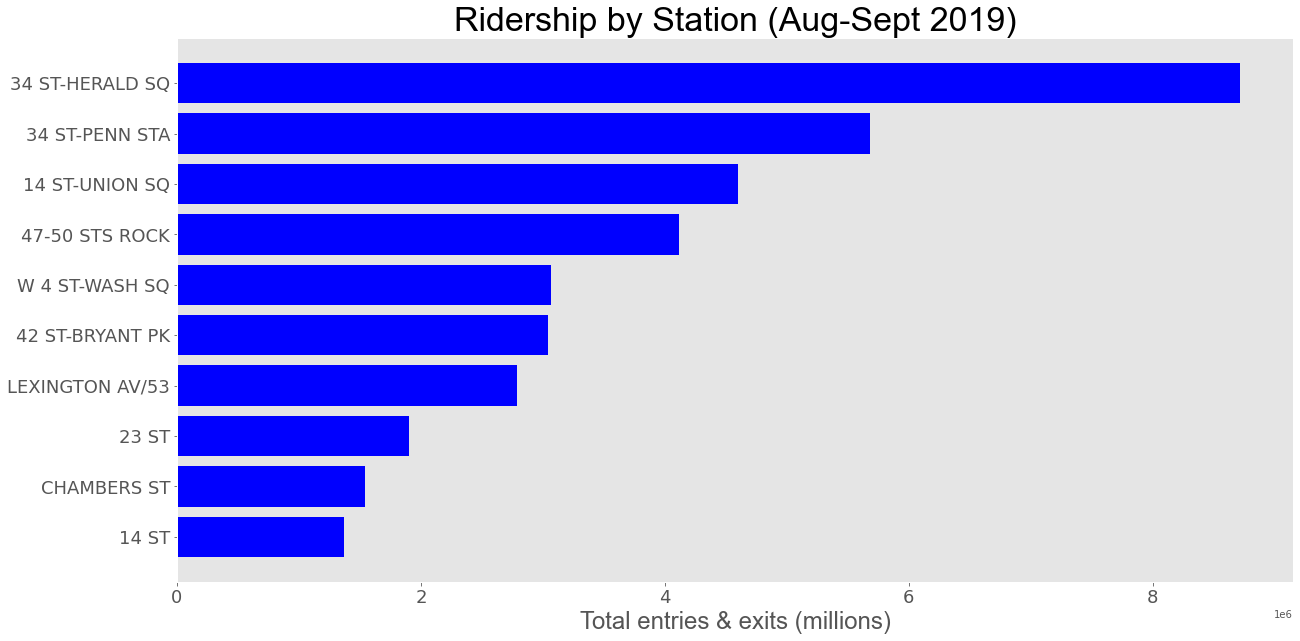

In [32]:
riders = top_10['total']
stations = top_10['station']

plt.figure(figsize=[20, 10], facecolor='white')
plt.barh(stations, riders, color='blue')
plt.title('Ridership by Station (Aug-Sept 2019)', fontsize=34, fontname='Arial')
plt.xlabel('Total entries & exits (millions)', fontname='Arial', fontsize=24)
#plt.ylabel('Station', fontname='Arial', fontsize=24)
plt.grid(False)
plt.tick_params(labelsize=18)


plt.savefig("top_10_stations_barh.svg")

In [44]:
top_10.head(3)

,station,linename,total,Station-Line
0,14 ST,ACEL,1372689.0,14 ST (ACEL)
1,CHAMBERS ST,ACE23,1542464.0,CHAMBERS ST (ACE23)
2,23 ST,FM,1905890.0,23 ST (FM)


## Generate TOP 10 station recommendation list from the original dataset and get prepare for time series analysis

In [45]:
station_final_list = list(station_final['station'])
station_final_list

['34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '14 ST-UNION SQ',
 '47-50 STS ROCK',
 'W 4 ST-WASH SQ',
 '42 ST-BRYANT PK',
 'LEXINGTON AV/53',
 '23 ST',
 'CHAMBERS ST',
 '14 ST']

In [46]:
station_df_final = mta[mta['station'].isin(station_final_list)]
station_df_final

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total
45681,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,05:00:00,2019-08-03 05:00:00,Saturday,99.0,48.0,147.0
45682,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,09:00:00,2019-08-03 09:00:00,Saturday,55.0,180.0,235.0
45683,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,13:00:00,2019-08-03 13:00:00,Saturday,221.0,564.0,785.0
45684,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,17:00:00,2019-08-03 17:00:00,Saturday,428.0,693.0,1121.0
45685,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03 00:00:00,21:00:00,2019-08-03 21:00:00,Saturday,440.0,546.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182386,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,05:00:00,2019-09-13 05:00:00,Friday,153.0,33.0,186.0
1182387,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,09:00:00,2019-09-13 09:00:00,Friday,691.0,252.0,943.0
1182388,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,13:00:00,2019-09-13 13:00:00,Friday,996.0,512.0,1508.0
1182389,W 4 ST-WASH SQ,W 4 ST-WASH SQ-N083-R138-01-06-01,N083,R138,01-06-01,ABCDEFM,7,IND,REGULAR,2019-09-13 00:00:00,17:00:00,2019-09-13 17:00:00,Friday,1677.0,289.0,1966.0


In [ ]:
station_df_final.to_csv('stations_final.csv', index=False)

In [47]:
station_df_final.shape

(120249, 16)

## Busy Stations Map

- Use Folium to plot the map and tileplayer
- Collect coordinates of NYC's large tech companies and recommended Top 10 stations
- Use LICEcap to record a Gif picture for presentation

In [48]:
import folium


In [49]:
# New York City Coordinates
NYC_COORD = [40.734426, -73.993664]

# Build map 
map_nyc = folium.Map(location=NYC_COORD, zoom_start=12.7, 
tiles='cartodbpositron', width=640, height=520)

# Add TilePlayers
tiles = ['openstreetmap', 'cartodbpositron', ]
for tile in tiles:
    folium.TileLayer(tile).add_to(map_nyc)

# Add targeted stations and tech companies

folium.Marker(location=[40.753485, -73.998782], tooltip='Amazon').add_to(map_nyc)

folium.Marker(location=[40.729394, -73.992057], tooltip='Slack').add_to(map_nyc)

folium.Marker(location=[40.754670, -73.984350], tooltip='SalesForce').add_to(map_nyc)

folium.Marker(location=[40.750675, -73.979067], tooltip='UiPath').add_to(map_nyc)

folium.Marker(location=[40.740165, -73.994909], tooltip='eBay').add_to(map_nyc)

folium.Marker(location=[40.756795, -73.989976], tooltip='Microsoft').add_to(map_nyc)

folium.Marker(location=[40.752109, -73.981495], tooltip='HP').add_to(map_nyc)

folium.Marker(location=[40.740750, -74.001977], tooltip='Google').add_to(map_nyc)

folium.Marker(location=[40.740227, -73.995707], tooltip='WeWork').add_to(map_nyc)

folium.Marker(location=[40.710651, -74.011824], tooltip='Spotify').add_to(map_nyc)

folium.Marker(location=[40.7127837, -74.0059413], tooltip='Twitter').add_to(map_nyc)

folium.Marker(location=[40.7364, -73.9936], tooltip='Compass').add_to(map_nyc)

folium.Marker(location=[40.7579,-73.9869679], tooltip='Adobe').add_to(map_nyc)

folium.Marker(location=[40.746583, -73.983191], tooltip='Gilt').add_to(map_nyc)

folium.Marker(location=[40.7234396,-74.0022822], tooltip='Square').add_to(map_nyc)

folium.Marker(location=[40.7105, 74.0121], tooltip='Asana').add_to(map_nyc)

folium.Marker(location=[40.7282, 73.9932], tooltip='SeatGeek').add_to(map_nyc)


folium.Circle([40.749622, -73.987824], 
                    radius=100, tooltip='34 ST-HERALD SQ', color='#FCCC0A', fill_color='#FCCC0A'
                   ).add_to(map_nyc)


folium.Circle([40.752062, -73.993273],
                    radius=100, tooltip='34ST-Penn Station', color='#0039A6', fill_color='#0039A6'
                   ).add_to(map_nyc)


folium.Circle([40.734823, -73.990701],
                    radius=100, tooltip='14ST-Union Sq', color='#FCCC0A', fill_color='#FCCC0A'
                   ).add_to(map_nyc)


folium.Circle([40.758956, -73.981444], 
                    radius=100, tooltip='47-50 STS ROCK', color='#FF6319', fill_color='#FF6319'
                   ).add_to(map_nyc)


folium.Circle([40.731146, -74.001198],
                    radius=100, tooltip='W 4 ST-WASH SQ', color='#0039A6', fill_color='#0039A6'
                   ).add_to(map_nyc)

folium.Circle([40.754788, -73.983939], 
                    radius=100, tooltip='42 ST-BRYANT PK', color='#EE3521', fill_color='#EE3521'
                   ).add_to(map_nyc)


folium.Circle([40.760170, -73.975550],
                    radius=100, tooltip='LEXINGTON AV/53', color='#FCCC0A', fill_color='#FCCC0A'
                   ).add_to(map_nyc)


folium.Circle([40.741290, -73.990064],
                    radius=100, tooltip='23 ST', color='#FF6319', fill_color='#FF6319'
                   ).add_to(map_nyc)


folium.Circle([40.713409, -74.003767],
                    radius=100, tooltip='CHAMBERS ST', color='#0039A6', fill_color='#0039A6'
                   ).add_to(map_nyc)


folium.Circle([40.740388, -74.001762],
                    radius=100, tooltip='14ST', color='#0039A6', fill_color='#0039A6'
                   ).add_to(map_nyc)



# create a layer control
folium.LayerControl().add_to(map_nyc)

map_nyc

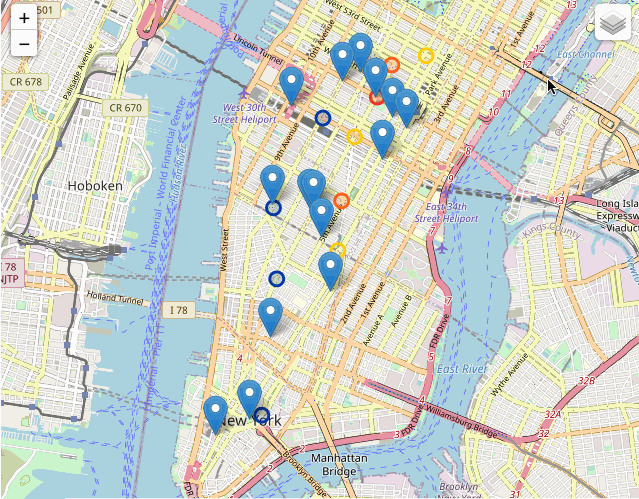

In [53]:
from IPython.display import Image
Image("graphics/MTA Stations and Tech Companies.gif")
